- SRCNN - Super Resolution Convolutional Neural netrwork
  - 최초의 cnn 기반 초해상도 모델
  - 입력 이미지를 업샘플링 후 cnn을 적용해서 고해상도 이미지를 생성
  - 학습과정이 단순하지만 성능이 비교적 제한
- GAN 기반 모델(SRGANm ESRGAN)
  - 생성적 적대 신경망(GAN)을 사용해서 초해상도를 학습
  - 생성자와 판별자를 경쟁적으로 학습시켜 더 세밀하고 사실적인 결과를 얻음
  - 최근의 초해상도 연구에서 가장 많이 사용  


- SRCNN VS GAN 기반 모델 비교
  - 비교항목   |       SRCNN                   |           GAN
  -  구조      |     단순한 CNN                |          생성자 + 판별자
  -  속도      |     빠름                      |          느림
  - 해상도 개선|     비교적 단순한 업스케일링  |        디데일까지 세밀한 초해상도
  - 학습방식   |      L2 손실(MSE) 기반        |        GAN + Peceptual Loss

SRCNN 수퍼 해상도 코드

In [1]:
# DIV2K 데이셋 다운로드
!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip
!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_HR.zip
!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_test_HR.zip

--2025-01-31 11:46:23--  http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip [following]
--2025-01-31 11:46:24--  https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3530603713 (3.3G) [application/zip]
Saving to: ‘DIV2K_train_HR.zip’

DIV2K_train_HR.zip  100%[===================>]   3.29G  21.4MB/s    in 2m 41s  

2025-01-31 11:49:05 (20.9 MB/s) - ‘DIV2K_train_HR.zip’ saved [3530603713/3530603713]

--2025-01-31 11:49:06--  http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_HR.zip
Resolving data.vision.ee.ethz.ch

In [2]:
!unzip /content/DIV2K_train_HR.zip

Archive:  /content/DIV2K_train_HR.zip
   creating: DIV2K_train_HR/
  inflating: DIV2K_train_HR/0103.png  
  inflating: DIV2K_train_HR/0413.png  
  inflating: DIV2K_train_HR/0031.png  
  inflating: DIV2K_train_HR/0660.png  
  inflating: DIV2K_train_HR/0126.png  
  inflating: DIV2K_train_HR/0793.png  
  inflating: DIV2K_train_HR/0764.png  
  inflating: DIV2K_train_HR/0550.png  
  inflating: DIV2K_train_HR/0437.png  
  inflating: DIV2K_train_HR/0374.png  
  inflating: DIV2K_train_HR/0755.png  
  inflating: DIV2K_train_HR/0614.png  
  inflating: DIV2K_train_HR/0646.png  
  inflating: DIV2K_train_HR/0371.png  
  inflating: DIV2K_train_HR/0312.png  
  inflating: DIV2K_train_HR/0108.png  
  inflating: DIV2K_train_HR/0556.png  
  inflating: DIV2K_train_HR/0794.png  
  inflating: DIV2K_train_HR/0722.png  
  inflating: DIV2K_train_HR/0780.png  
  inflating: DIV2K_train_HR/0555.png  
  inflating: DIV2K_train_HR/0439.png  
  inflating: DIV2K_train_HR/0396.png  
  inflating: DIV2K_train_HR/0666.png

Epoch 1/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.4531 - loss: 0.0698 - val_accuracy: 0.6269 - val_loss: 0.0224
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6532 - loss: 0.0210 - val_accuracy: 0.6650 - val_loss: 0.0174
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6979 - loss: 0.0172 - val_accuracy: 0.7496 - val_loss: 0.0150
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7543 - loss: 0.0147 - val_accuracy: 0.7653 - val_loss: 0.0138
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7406 - loss: 0.0156 - val_accuracy: 0.7729 - val_loss: 0.0134
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7721 - loss: 0.0140 - val_accuracy: 0.7776 - val_loss: 0.0126
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7806 - loss: 0.0126 - val_accuracy: 0.7749 - val_loss: 0.0121
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7859 - loss: 0.0116 - val_accuracy: 0.7635 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


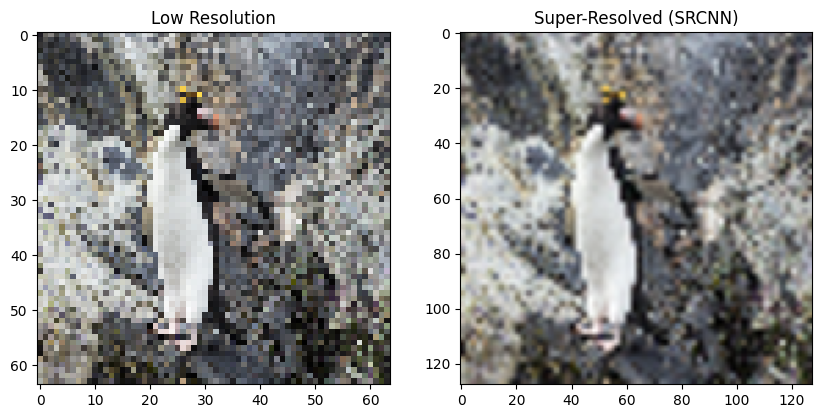

In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import cv2
import glob

# 모델이 64x64 크기의 저해상도 이미지를 받아 128x128 크기의 고해상도 이미지를 출력

# SRCNN 모델 정의
def build_srcnn():
    model = keras.Sequential([
        layers.Conv2D(64, (9, 9), activation='relu', padding='same', input_shape=(64, 64, 3)),  # 64x64 크기 입력
        layers.Conv2D(32, (5, 5), activation='relu', padding='same'),
        layers.Conv2D(3, (5, 5), activation='linear', padding='same'),  # 3채널 RGB 출력
        layers.UpSampling2D(size=(2, 2), interpolation='bilinear')  # 64x64 -> 128x128으로 업샘플링
    ])
    return model

# 이미지 데이터 로딩 및 전처리
def load_train_data(img_path ='/content/DIV2K_train_HR/*.png'):
    images = []
    files = glob.glob(img_path)
    for file in files:
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128,128), interpolation=cv2.INTER_CUBIC)  # 크기 통일
        images.append(img / 255.0)  # 정규화
    images = np.array(images)

    # 저해상도 이미지 생성 (64x64)
    low_res = np.array([cv2.resize(img, (64, 64), interpolation=cv2.INTER_CUBIC) for img in images])
    return low_res, images

# 학습 데이터 준비
x_train, y_train = load_train_data()

# SRCNN 모델 컴파일 및 학습
srcnn = build_srcnn()
srcnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# 모델 학습
srcnn.fit(x_train, y_train, epochs=100, batch_size=8, validation_split=0.1)

# 모델 저장
srcnn.save("srcnn_trained.h5")

# 모델 예측 및 결과 확인
test_img = '/content/DIV2K_valid_HR/0801.png'  # 예시 테스트 이미지 경로
low_res_img = cv2.imread(test_img)
low_res_img = cv2.cvtColor(low_res_img, cv2.COLOR_BGR2RGB)
low_res_img = cv2.resize(low_res_img, (64, 64), interpolation=cv2.INTER_CUBIC)
low_res_img = low_res_img / 255.0  # 정규화
low_res_img = np.expand_dims(low_res_img, axis=0)  # 배치 차원 추가

# 예측
high_res_img = srcnn.predict(low_res_img)

# 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Low Resolution")
plt.imshow(low_res_img[0])  # 배치 차원 제거
plt.subplot(1, 2, 2)
plt.title("Super-Resolved (SRCNN)")
plt.imshow(np.clip(high_res_img[0], 0, 1))  # 고해상도 이미지 출력
plt.show()


In [23]:
# 모델 불러오기
model = keras.models.load_model('srcnn_trained.h5')
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

In [13]:
!unzip /content/DIV2K_valid_HR.zip

Archive:  /content/DIV2K_valid_HR.zip
   creating: DIV2K_valid_HR/
  inflating: DIV2K_valid_HR/0897.png  
  inflating: DIV2K_valid_HR/0887.png  
  inflating: DIV2K_valid_HR/0806.png  
  inflating: DIV2K_valid_HR/0834.png  
  inflating: DIV2K_valid_HR/0896.png  
  inflating: DIV2K_valid_HR/0881.png  
  inflating: DIV2K_valid_HR/0828.png  
  inflating: DIV2K_valid_HR/0833.png  
  inflating: DIV2K_valid_HR/0877.png  
  inflating: DIV2K_valid_HR/0826.png  
  inflating: DIV2K_valid_HR/0879.png  
  inflating: DIV2K_valid_HR/0812.png  
  inflating: DIV2K_valid_HR/0809.png  
  inflating: DIV2K_valid_HR/0865.png  
  inflating: DIV2K_valid_HR/0882.png  
  inflating: DIV2K_valid_HR/0830.png  
  inflating: DIV2K_valid_HR/0892.png  
  inflating: DIV2K_valid_HR/0859.png  
  inflating: DIV2K_valid_HR/0858.png  
  inflating: DIV2K_valid_HR/0816.png  
  inflating: DIV2K_valid_HR/0836.png  
  inflating: DIV2K_valid_HR/0857.png  
  inflating: DIV2K_valid_HR/0824.png  
  inflating: DIV2K_valid_HR/0823.png

In [24]:
def load_and_preprocess_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        raise FileNotFoundError(f" 이미지 파일을 찾을 수 없습니다: {img_path}")

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img.shape[1]//4, img.shape[0]//4), interpolation=cv2.INTER_CUBIC)
    img = cv2.resize(img, (img.shape[1]*4, img.shape[0]*4), interpolation=cv2.INTER_CUBIC)
    img = img.astype(np.float32) / 255.0
    return np.expand_dims(img, axis=0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


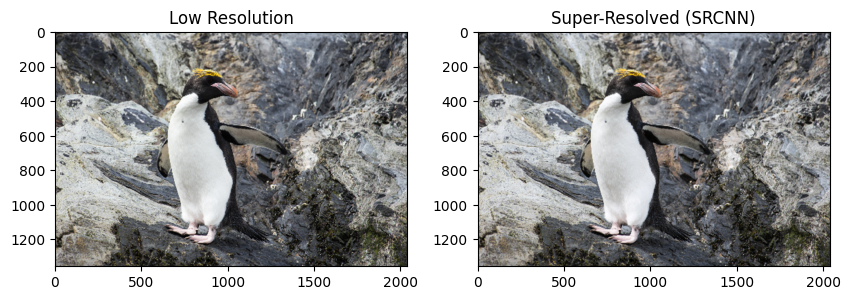

In [25]:
test_img = '/content/DIV2K_valid_HR/0801.png'
low_res_img = load_and_preprocess_image(test_img)
high_res_img = model.predict(low_res_img)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Low Resolution")
plt.imshow(low_res_img[0])
plt.subplot(1, 2, 2)
plt.title("Super-Resolved (SRCNN)")
high_res_img = np.squeeze(high_res_img)  # 배치 차원 제거
plt.imshow(np.clip(high_res_img, 0, 1))
plt.show()

In [26]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessicali9530/celeba-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.33G/1.33G [00:20<00:00, 68.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2


In [33]:
glob.glob(path+'/**',recursive=True)

['/root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2/',
 '/root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2/list_landmarks_align_celeba.csv',
 '/root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2/list_eval_partition.csv',
 '/root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2/list_bbox_celeba.csv',
 '/root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2/img_align_celeba',
 '/root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2/img_align_celeba/img_align_celeba',
 '/root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2/img_align_celeba/img_align_celeba/011954.jpg',
 '/root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2/img_align_celeba/img_align_celeba/103528.jpg',
 '/root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2/img_align_celeba/img_align_celeba/100779.jpg',
 '/root/.cache/kagglehub/datasets/jessicali9530/cele

In [36]:
jpg_paths = '/root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2/img_align_celeba/img_align_celeba'
glob.glob(jpg_paths + '/*.jpg')[0]

'/root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2/img_align_celeba/img_align_celeba/011954.jpg'

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


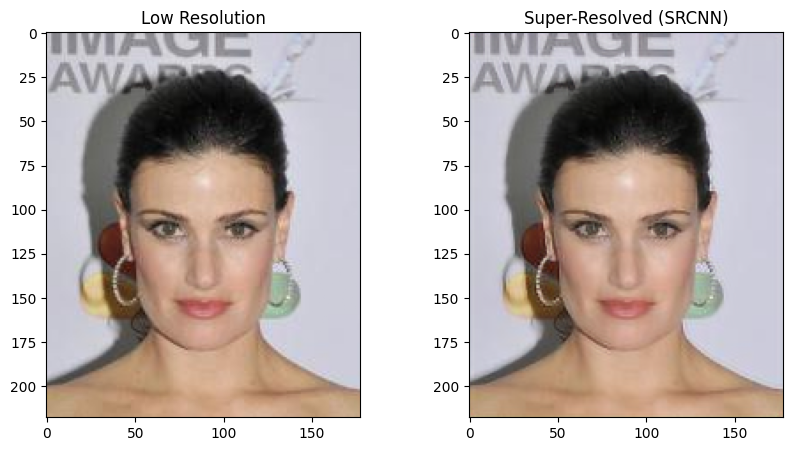

In [38]:
test_img = glob.glob(jpg_paths + '/*.jpg')[0]
img = cv2.imread(test_img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.astype(np.float32) / 255.0
low_res_img = np.expand_dims(img, axis=0)

high_res_img = model.predict(low_res_img)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Low Resolution")
plt.imshow(low_res_img[0])
plt.subplot(1, 2, 2)
plt.title("Super-Resolved (SRCNN)")
high_res_img = np.squeeze(high_res_img)  # 배치 차원 제거
plt.imshow(np.clip(high_res_img, 0, 1))
plt.show()